#Elaboradores:

1 - Victor Hugo

2 -  Yuri Ageme

#INFRA

##Service Account GCloud

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 7.9 MB/s eta 0:00:00


In [ ]:
from google.cloud import storage
import os
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/sunny-web-377820-a4302d846fd7.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount
path = 'gs://soulcodepandasatv/originais/marketing_campaign.csv'

##Service Account MongoDB

In [ ]:
import pymongo
from pymongo import MongoClient

#Conector MongoDB Atlas
uri = "mongodb+srv://yuriageme01.5tnqyaz.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri, tls=True, tlsCertificateKeyFile='/content/X509-cert-2078076859739150991.pem')

##Migração db Cloud para MongoDB

In [ ]:
import pandas as pd
df = pd.read_csv(path)

In [ ]:
##Criação do DB no MongoDB
db_marketingCampaign = client['marketingCampaign']
colecao_originais = db_marketingCampaign['originais']

In [ ]:
##converter df to dict
df_dict = df.to_dict("records")
##carregamento do dict no DB
colecao_originais.insert_many(df_dict)

In [ ]:
for doc in colecao_originais.find({}):
  print(doc)

{'_id': ObjectId('640b437f4d3495ab110ff31e'), 'ID': 5524, 'Year_Birth': 1957, 'Education': 'Graduation', 'Marital_Status': 'Single', 'Income': 58138.0, 'Kidhome': 0, 'Teenhome': 0, 'Dt_Customer': '04-09-2012', 'Recency': 58, 'MntWines': 635, 'MntFruits': 88, 'MntMeatProducts': 546, 'MntFishProducts': 172, 'MntSweetProducts': 88, 'MntGoldProds': 88, 'NumDealsPurchases': 3, 'NumWebPurchases': 8, 'NumCatalogPurchases': 10, 'NumStorePurchases': 4, 'NumWebVisitsMonth': 7, 'AcceptedCmp3': 0, 'AcceptedCmp4': 0, 'AcceptedCmp5': 0, 'AcceptedCmp1': 0, 'AcceptedCmp2': 0, 'Complain': 0, 'Z_CostContact': 3, 'Z_Revenue': 11, 'Response': 1}
{'_id': ObjectId('640b437f4d3495ab110ff31f'), 'ID': 2174, 'Year_Birth': 1954, 'Education': 'Graduation', 'Marital_Status': 'Single', 'Income': 46344.0, 'Kidhome': 1, 'Teenhome': 1, 'Dt_Customer': '08-03-2014', 'Recency': 38, 'MntWines': 11, 'MntFruits': 1, 'MntMeatProducts': 6, 'MntFishProducts': 2, 'MntSweetProducts': 1, 'MntGoldProds': 6, 'NumDealsPurchases': 2,

#Tratamento dos Dados

In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


##Tradução dos Dados

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.rename(columns={
    'Year_Birth': 'ano_nascimento', 
    'Education' : 'escolaridade', 
    'Marital_Status': 'estado_civil', 
    'Income': 'renda', 
    'Kidhome': 'qtd_criancas',
    'Teenhome': 'qtd_adolescentes', 
    'Dt_Customer': 'data_cadastro', 
    'Recency': 'recencia', 
    'MntWines' : 'valor_gasto_vinhos', 
    'MntFruits' : 'valor_gasto_frutas',
    'MntMeatProducts' : 'valor_gasto_carnes', 
    'MntFishProducts': 'valor_gasto_peixes', 
    'MntSweetProducts': 'valor_gasto_doces',
    'MntGoldProds' : 'valor_gasto_podutosGold', 
    'NumDealsPurchases': 'qtd_compras_desconto', 
    'NumWebPurchases': 'qtd_compras_site',
    'NumCatalogPurchases': 'qtd_compras_catalogo', 
    'NumStorePurchases' : 'qtd_compras_lojas', 
    'NumWebVisitsMonth' : 'qtd_visitas_site_ultimo_mes',
    'AcceptedCmp3':'adesao_campanha3', 
    'AcceptedCmp4': 'adesao_campanha4', 
    'AcceptedCmp5': 'adesao_campanha5', 
    'AcceptedCmp1':'adesao_campanha1',
    'AcceptedCmp2': 'adesao_campanha2',
    'Complain':'reclamacao',
    'Response': 'adesão_ultima_campanha'
}, inplace=True)

# obs: Verificar colunas: 'Z_CostContact', 'Z_Revenue'

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,Z_CostContact,Z_Revenue,adesão_ultima_campanha
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
pd.unique(df.Z_CostContact)

array([3])

In [ ]:
pd.unique(df.Z_Revenue)


array([11])

In [ ]:
# Valores das colunas ['Z_CostContact', 'Z_Revenue'] são iguais. Sem relevância para análise   

df.drop(['Z_CostContact', 'Z_Revenue'],axis=1,inplace=True)

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
#Varificar valores da coluna escolaridade
pd.unique(df.escolaridade)

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
escolaridade = {'Graduation': 'Graduacao', 
                'Master':'Mestrado', 
                'Basic':'Basico', 
                '2n Cycle': 'Segundo Ciclo'
                }
for key,value in escolaridade.items():
  df.loc[df.escolaridade==key,'escolaridade']=value 

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
0,5524,1957,Graduacao,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestrado,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
pd.unique(df.estado_civil)

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
estado_civil = {
    'Single': 'Solteiro',
    'Together':'Uniao estavel',
    'Married': 'Casado',
    'Divorced': 'Divorciado',
    'Widow': 'Viuvo',
    'Alone': 'Sozinho',
}

In [ ]:
df.groupby('estado_civil').size()

estado_civil
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [ ]:
for key,value in estado_civil.items():
  df.loc[df.estado_civil==key,'estado_civil']=value 

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao estavel,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao estavel,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Uniao estavel,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestrado,Uniao estavel,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


##Tipagem dos Dados

In [ ]:
df.dtypes
# obs: transformar o type da coluna Dt_Customer de objetct para datetime

ID                               int64
ano_nascimento                   int64
escolaridade                    object
estado_civil                    object
renda                          float64
qtd_criancas                     int64
qtd_adolescentes                 int64
data_cadastro                   object
recencia                         int64
valor_gasto_vinhos               int64
valor_gasto_frutas               int64
valor_gasto_carnes               int64
valor_gasto_peixes               int64
valor_gasto_doces                int64
valor_gasto_podutosGold          int64
qtd_compras_desconto             int64
qtd_compras_site                 int64
qtd_compras_catalogo             int64
qtd_compras_lojas                int64
qtd_visitas_site_ultimo_mes      int64
adesao_campanha3                 int64
adesao_campanha4                 int64
adesao_campanha5                 int64
adesao_campanha1                 int64
adesao_campanha2                 int64
reclamacao               

In [ ]:
dfback = df.copy()

In [ ]:
df.data_cadastro = pd.to_datetime(df.data_cadastro, format='%d-%m-%Y')

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao estavel,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao estavel,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Uniao estavel,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestrado,Uniao estavel,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
df.dtypes

ID                                      int64
ano_nascimento                          int64
escolaridade                           object
estado_civil                           object
renda                                 float64
qtd_criancas                            int64
qtd_adolescentes                        int64
data_cadastro                  datetime64[ns]
recencia                                int64
valor_gasto_vinhos                      int64
valor_gasto_frutas                      int64
valor_gasto_carnes                      int64
valor_gasto_peixes                      int64
valor_gasto_doces                       int64
valor_gasto_podutosGold                 int64
qtd_compras_desconto                    int64
qtd_compras_site                        int64
qtd_compras_catalogo                    int64
qtd_compras_lojas                       int64
qtd_visitas_site_ultimo_mes             int64
adesao_campanha3                        int64
adesao_campanha4                  

In [ ]:
df.isna().sum()

ID                              0
ano_nascimento                  0
escolaridade                    0
estado_civil                    0
renda                          24
qtd_criancas                    0
qtd_adolescentes                0
data_cadastro                   0
recencia                        0
valor_gasto_vinhos              0
valor_gasto_frutas              0
valor_gasto_carnes              0
valor_gasto_peixes              0
valor_gasto_doces               0
valor_gasto_podutosGold         0
qtd_compras_desconto            0
qtd_compras_site                0
qtd_compras_catalogo            0
qtd_compras_lojas               0
qtd_visitas_site_ultimo_mes     0
adesao_campanha3                0
adesao_campanha4                0
adesao_campanha5                0
adesao_campanha1                0
adesao_campanha2                0
reclamacao                      0
adesão_ultima_campanha          0
dtype: int64

In [ ]:
filtronulo = df.renda.isna()
df.loc[filtronulo]

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
10,1994,1983,Graduacao,Casado,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduacao,Solteiro,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Solteiro,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduacao,Solteiro,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduacao,Solteiro,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,Segundo Ciclo,Casado,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Casado,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduacao,Solteiro,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Mestrado,Uniao estavel,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Casado,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao estavel,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao estavel,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Uniao estavel,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestrado,Uniao estavel,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


#LOAD dados tratados

In [ ]:
#Salvar no bucket
df.to_csv('gs://soulcodepandasatv/tratados/marketing_campaign_tratados.csv',index=False)

In [ ]:
##Carregamento da base tratada para o MongoDB

##Criação da coleção de dados tratados
colecao_tratados = db_marketingCampaign['tratados']
colecao_tratados.count_documents({})

0

In [ ]:
##converter df to dict
df_dict = df.to_dict("records")
##carregamento do dict no DB
colecao_tratados.insert_many(df_dict)
colecao_tratados.count_documents({})

2240

#Análises dos Dados

In [ ]:
df

,ID,ano_nascimento,escolaridade,estado_civil,renda,qtd_criancas,qtd_adolescentes,data_cadastro,recencia,valor_gasto_vinhos,valor_gasto_frutas,valor_gasto_carnes,valor_gasto_peixes,valor_gasto_doces,valor_gasto_podutosGold,qtd_compras_desconto,qtd_compras_site,qtd_compras_catalogo,qtd_compras_lojas,qtd_visitas_site_ultimo_mes,adesao_campanha3,adesao_campanha4,adesao_campanha5,adesao_campanha1,adesao_campanha2,reclamacao,adesão_ultima_campanha
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao estavel,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao estavel,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Uniao estavel,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestrado,Uniao estavel,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['ID', 'ano_nascimento', 'escolaridade', 'estado_civil', 'renda',
       'qtd_criancas', 'qtd_adolescentes', 'data_cadastro', 'recencia',
       'valor_gasto_vinhos', 'valor_gasto_frutas', 'valor_gasto_carnes',
       'valor_gasto_peixes', 'valor_gasto_doces', 'valor_gasto_podutosGold',
       'qtd_compras_desconto', 'qtd_compras_site', 'qtd_compras_catalogo',
       'qtd_compras_lojas', 'qtd_visitas_site_ultimo_mes', 'adesao_campanha3',
       'adesao_campanha4', 'adesao_campanha5', 'adesao_campanha1',
       'adesao_campanha2', 'reclamacao', 'adesão_ultima_campanha'],
      dtype='object')

##***Análise Estado Civil***

###Análise Estado Civil x Produtos Comprados

In [ ]:
df_estcivil = df.groupby('estado_civil').size().sort_values(ascending=False)/2240*100
df_estcivil

estado_civil
Casado           38.571429
Uniao estavel    25.892857
Solteiro         21.428571
Divorciado       10.357143
Viuvo             3.437500
Sozinho           0.133929
Absurd            0.089286
YOLO              0.089286
dtype: float64

<AxesSubplot:xlabel='Estado Civil', ylabel='% Clientes'>

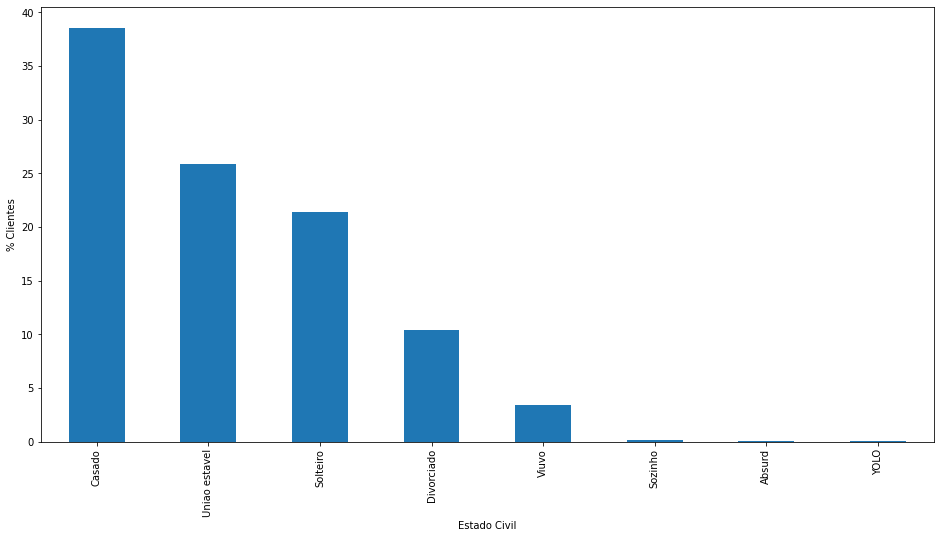

In [ ]:
df_estcivil.plot.bar(xlabel='Estado Civil',ylabel='% Clientes',figsize=(16,8))

In [ ]:
df_estcivil_prod = df.groupby('estado_civil').agg(compras_vinho=('valor_gasto_vinhos', 'sum'), 
                               compras_frutas=('valor_gasto_frutas', 'sum'),
                               compras_carnes = ('valor_gasto_carnes', 'sum'),
                               compras_peixes = ('valor_gasto_peixes', 'sum'),
                               compras_doces = ('valor_gasto_doces', 'sum'),
                               compras_gold = ('valor_gasto_podutosGold', 'sum'),                              
                               )
df_estcivil_prod

,compras_vinho,compras_frutas,compras_carnes,compras_peixes,compras_doces,compras_gold
estado_civil,,,,,,
Absurd,711,169,625,411,61,408
Casado,258751,22235,138829,30569,23070,36999
Divorciado,75364,6363,34848,8130,6222,10739
Solteiro,138399,12881,87412,18344,13086,20990
Sozinho,554,12,79,23,21,81
Uniao estavel,177959,14703,97500,22615,15151,24937
Viuvo,28434,2548,14575,3957,3004,4371
YOLO,644,6,100,8,6,84


<AxesSubplot:ylabel='estado_civil'>

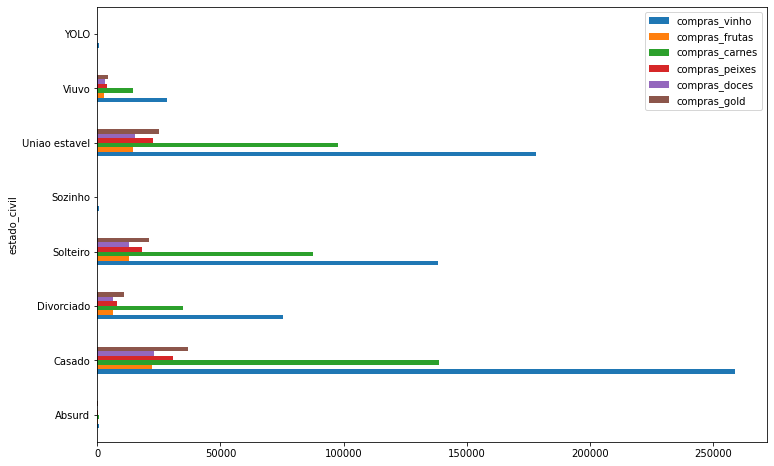

In [ ]:
df_estcivil_prod.plot.barh(figsize=(12,8))

###Análise Estado Civil x Canais de vendas

In [ ]:
df_estadcivil_canais = df.groupby('estado_civil').agg(compras_desconto=('qtd_compras_desconto', 'sum'), 
                               compras_site=('qtd_compras_site', 'sum'),
                               compras_catalogo = ('qtd_compras_catalogo', 'sum'),
                               compras_lojas = ('qtd_compras_lojas', 'sum'))

df_estadcivil_canais

,compras_desconto,compras_site,compras_catalogo,compras_lojas
estado_civil,,,,
Absurd,4,7,15,13
Casado,2067,3532,2268,5055
Divorciado,565,1000,620,1350
Solteiro,1023,1859,1248,2707
Sozinho,11,15,2,12
Uniao estavel,1348,2367,1552,3327
Viuvo,180,356,256,494
YOLO,10,14,2,12


<AxesSubplot:ylabel='estado_civil'>

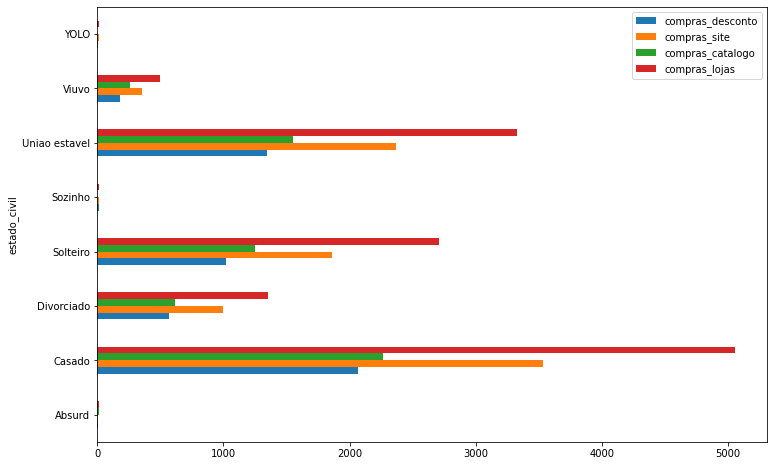

In [ ]:
df_estadcivil_canais.plot.barh(figsize=(12,8))

### Analise Estado Civil x Adesão às campanhas

In [ ]:
df_estcivil_adesao = df.groupby('estado_civil').agg(adesao1=('adesao_campanha1', 'sum'), 
                               adesao2=('adesao_campanha2', 'sum'),
                               adesao3=('adesao_campanha3', 'sum'),
                               adesao4=('adesao_campanha4', 'sum'),
                               adesao5=('adesao_campanha5','sum'),
                               adesao_ultima=('adesão_ultima_campanha','sum'))
df_estcivil_adesao

,adesao1,adesao2,adesao3,adesao4,adesao5,adesao_ultima
estado_civil,,,,,,
Absurd,1,0,0,0,1,1
Casado,63,7,63,63,66,98
Divorciado,12,5,20,18,13,48
Solteiro,31,5,38,33,31,106
Sozinho,0,0,1,0,0,1
Uniao estavel,32,12,37,43,44,60
Viuvo,5,1,4,10,8,19
YOLO,0,0,0,0,0,1


<AxesSubplot:ylabel='estado_civil'>

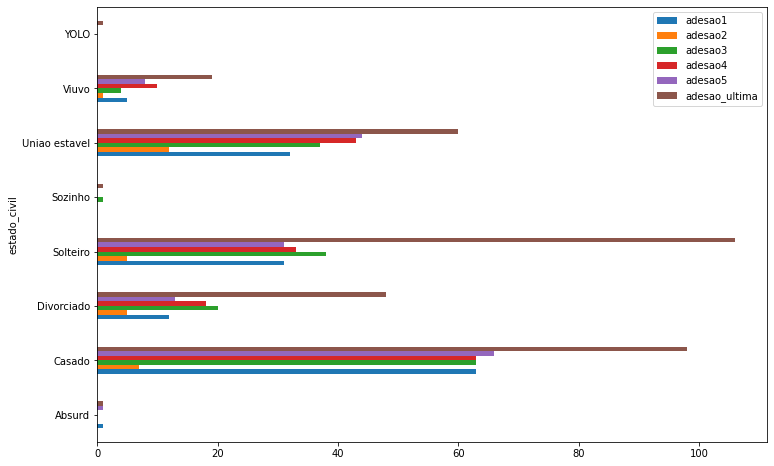

In [ ]:
df_estcivil_adesao.plot.barh(figsize=(12,8))

##***Análise Escolaridade***

In [ ]:
df_escol = df.groupby('escolaridade').size().sort_values(ascending=False)/2240*100
df_escol

escolaridade
Graduacao        50.312500
PhD              21.696429
Mestrado         16.517857
Segundo Ciclo     9.062500
Basico            2.410714
dtype: float64

<AxesSubplot:ylabel='Escolaridade dos Clientes'>

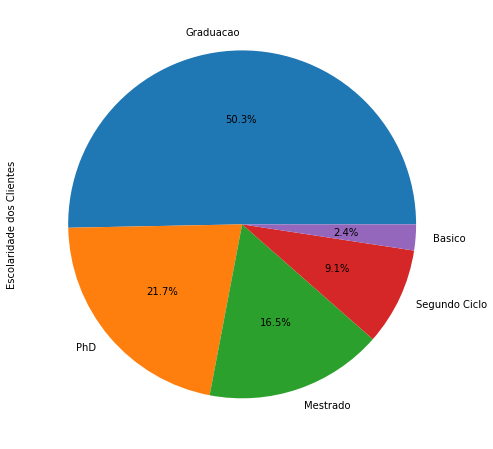

In [ ]:
df_escol.plot(kind='pie', ylabel='Escolaridade dos Clientes', autopct='%1.1f%%', figsize=(16,8))

###Análise Escolaridade x Produtos Comprados

In [ ]:
df_escolaridade_prod = df.groupby('escolaridade').agg(compras_vinho=('valor_gasto_vinhos', 'sum'), 
                               compras_frutas=('valor_gasto_frutas', 'sum'),
                               compras_carnes = ('valor_gasto_carnes', 'sum'),
                               compras_peixes = ('valor_gasto_peixes', 'sum'),
                               compras_doces = ('valor_gasto_doces', 'sum'),
                               compras_gold = ('valor_gasto_podutosGold', 'sum'),                              
                               )
df_escolaridade_prod

,compras_vinho,compras_frutas,compras_carnes,compras_peixes,compras_doces,compras_gold
escolaridade,,,,,,
Basico,391,600,618,921,654,1233
Graduacao,320371,34683,202284,48630,35351,57307
Mestrado,123238,8012,60450,11877,7835,14947
PhD,196585,9744,81941,12990,9828,15703
Segundo Ciclo,40231,5878,28675,9639,6953,9419


<AxesSubplot:ylabel='escolaridade'>

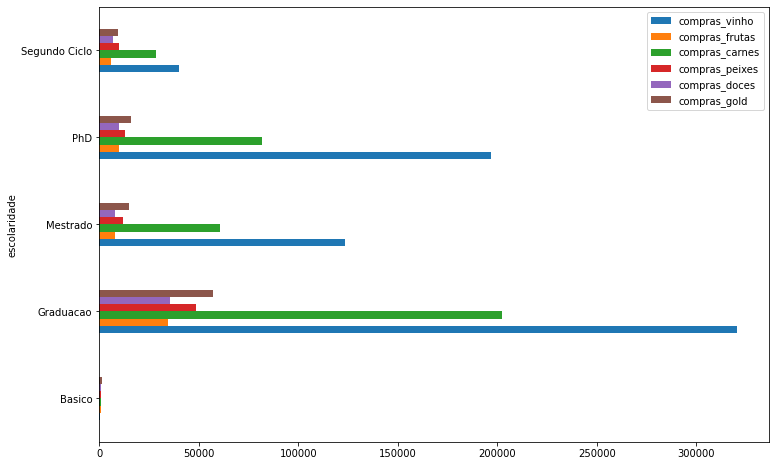

In [ ]:
df_escolaridade_prod.plot.barh(figsize=(12,8))

###Análise Escolaridade x Canais de vendas

In [ ]:
df_escolaridade_canais = df.groupby('escolaridade').agg(compras_desconto=('qtd_compras_desconto', 'sum'), 
                               compras_site=('qtd_compras_site', 'sum'),
                               compras_catalogo = ('qtd_compras_catalogo', 'sum'),
                               compras_lojas = ('qtd_compras_lojas', 'sum'))

df_escolaridade_canais

,compras_desconto,compras_site,compras_catalogo,compras_lojas
escolaridade,,,,
Basico,97,102,26,154
Graduacao,2603,4649,3072,6570
Mestrado,898,1492,951,2182
PhD,1154,2150,1443,2946
Segundo Ciclo,456,757,471,1118


<AxesSubplot:ylabel='escolaridade'>

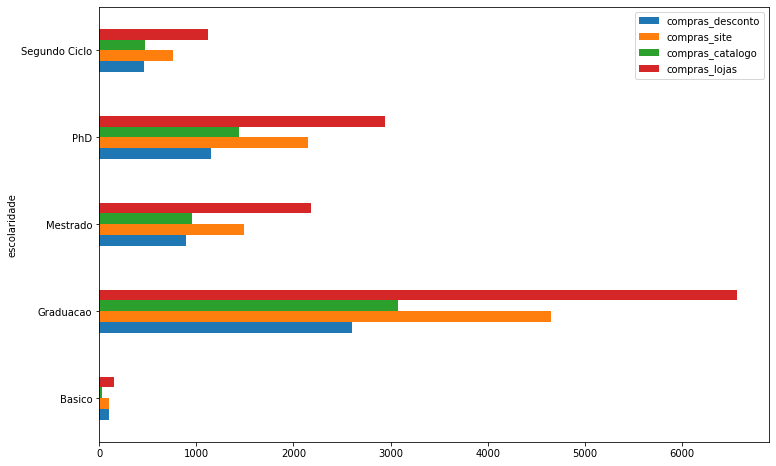

In [ ]:
df_escolaridade_canais.plot.barh(figsize=(12,8))

### Analise escolaridade x Adesão às campanhas

In [ ]:
df_escolaridade_adesao = df.groupby('escolaridade').agg(adesao1=('adesao_campanha1', 'sum'), 
                               adesao2=('adesao_campanha2', 'sum'),
                               adesao3=('adesao_campanha3', 'sum'),
                               adesao4=('adesao_campanha4', 'sum'),
                               adesao5=('adesao_campanha5','sum'),
                               adesao_ultima=('adesão_ultima_campanha','sum'))
df_escolaridade_adesao

,adesao1,adesao2,adesao3,adesao4,adesao5,adesao_ultima
escolaridade,,,,,,
Basico,0,0,6,0,0,2
Graduacao,82,16,78,81,86,152
Mestrado,18,2,24,31,28,57
PhD,30,10,40,45,39,101
Segundo Ciclo,14,2,15,10,10,22


<AxesSubplot:ylabel='escolaridade'>

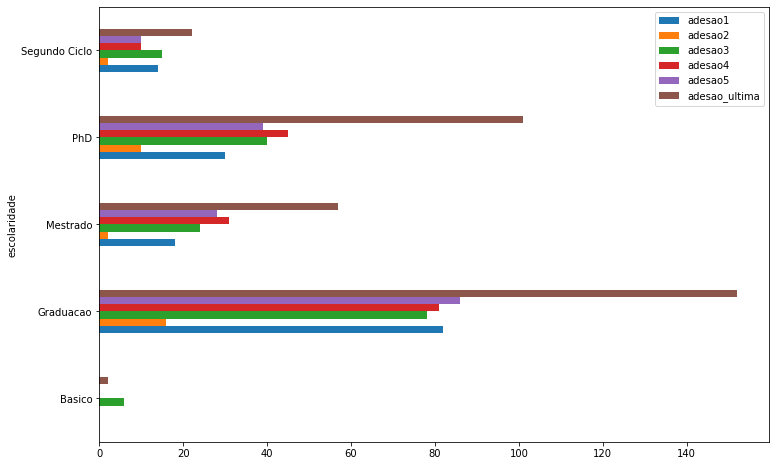

In [ ]:
df_escolaridade_adesao.plot.barh(figsize=(12,8))

##***Análise Faixa Etária***

In [ ]:
df['idade'] = 2020 - df['ano_nascimento']

In [ ]:
df.idade.describe()

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: idade, dtype: float64

<AxesSubplot:>

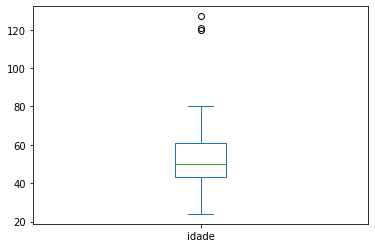

In [ ]:
df.idade.plot.box()

In [ ]:
#Criação de categorias de faixas etárias:
#Jovem: 0-19
#Adulto: 20-59
#Idoso jovem: 60-74
#Idoso velho: 75-85
#Idoso extremo: 86 -
df['faixa_etaria'] = pd.cut(df['idade'], bins=[0,19,59,74,85,130],labels=['Jovem','Adulto','Idoso jovem','Idoso velho','Idoso extremo'])

In [ ]:
df_faixaet = df.groupby('faixa_etaria').size().sort_values(ascending=False)/2240*100
df_faixaet

faixa_etaria
Adulto           72.366071
Idoso jovem      26.428571
Idoso velho       1.071429
Idoso extremo     0.133929
Jovem             0.000000
dtype: float64

<AxesSubplot:ylabel='Classe Etária dos Clientes'>

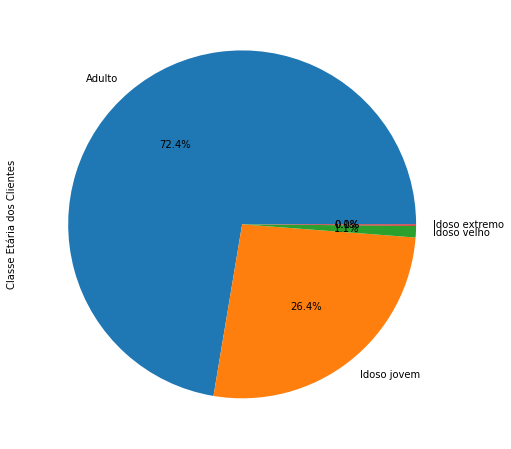

In [ ]:
df_faixaet.plot(kind='pie', ylabel='Classe Etária dos Clientes', autopct='%1.1f%%', figsize=(16,8))

###Análise Faixa Etária x Produtos Comprados

In [ ]:
df_faixaet_prod = df.groupby('faixa_etaria').agg(compras_vinho=('valor_gasto_vinhos', 'sum'), 
                               compras_frutas=('valor_gasto_frutas', 'sum'),
                               compras_carnes = ('valor_gasto_carnes', 'sum'),
                               compras_peixes = ('valor_gasto_peixes', 'sum'),
                               compras_doces = ('valor_gasto_doces', 'sum'),
                               compras_gold = ('valor_gasto_podutosGold', 'sum'),                              
                               )
df_faixaet_prod

,compras_vinho,compras_frutas,compras_carnes,compras_peixes,compras_doces,compras_gold
faixa_etaria,,,,,,
Jovem,0,0,0,0,0,0
Adulto,450014,41403,256437,57205,42170,68262
Idoso jovem,216623,16085,109762,24877,17280,29106
Idoso velho,13401,1279,7194,1857,1103,990
Idoso extremo,778,150,575,118,68,251


<AxesSubplot:ylabel='faixa_etaria'>

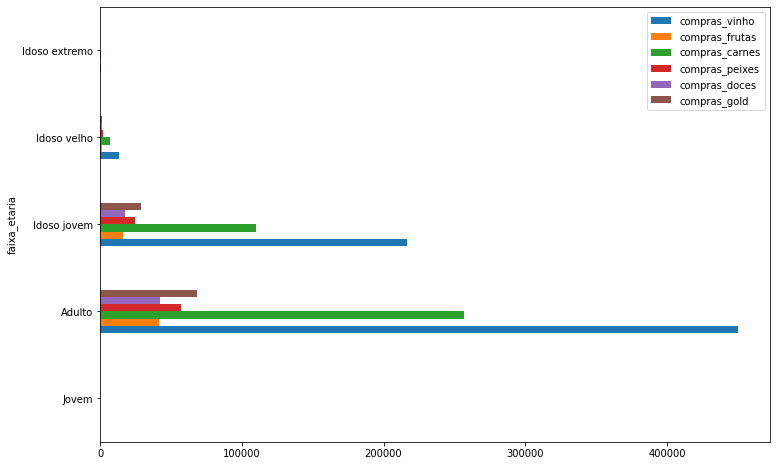

In [ ]:
df_faixaet_prod.plot.barh(figsize=(12,8))

###Faixa Etária x Canais de compras

In [ ]:
df_faixaet_canais = df.groupby('faixa_etaria').agg(compras_desconto=('qtd_compras_desconto', 'sum'), 
                               compras_site=('qtd_compras_site', 'sum'),
                               compras_catalogo = ('qtd_compras_catalogo', 'sum'),
                               compras_lojas = ('qtd_compras_lojas', 'sum'))

df_faixaet_canais

,compras_desconto,compras_site,compras_catalogo,compras_lojas
faixa_etaria,,,,
Jovem,0,0,0,0
Adulto,3761,6347,3929,9001
Idoso jovem,1417,2637,1913,3780
Idoso velho,27,159,114,181
Idoso extremo,3,7,7,8


<AxesSubplot:ylabel='faixa_etaria'>

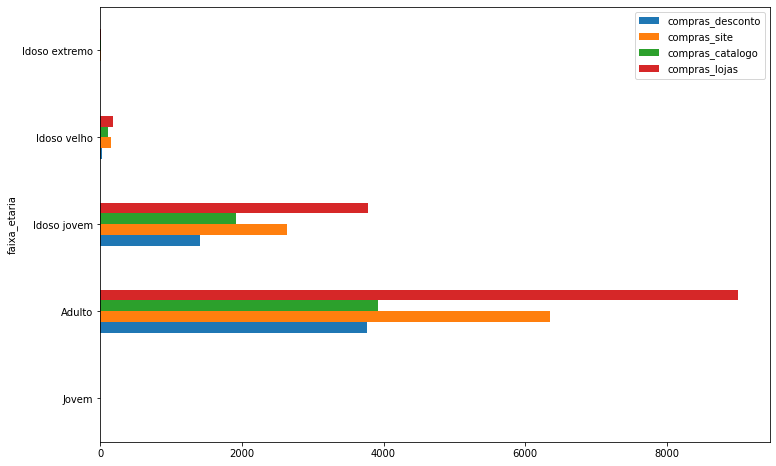

In [ ]:
df_faixaet_canais.plot.barh(figsize=(12,8))

###Análise Faixa Etária x Adesão Campanhas

In [ ]:
df_faixaet_adesao = df.groupby('faixa_etaria').agg(adesao1=('adesao_campanha1', 'sum'), 
                               adesao2=('adesao_campanha2', 'sum'),
                               adesao3=('adesao_campanha3', 'sum'),
                               adesao4=('adesao_campanha4', 'sum'),
                               adesao5=('adesao_campanha5','sum'),
                               adesao_ultima=('adesão_ultima_campanha','sum'))
df_faixaet_adesao

,adesao1,adesao2,adesao3,adesao4,adesao5,adesao_ultima
faixa_etaria,,,,,,
Jovem,0,0,0,0,0,0
Adulto,96,21,128,107,113,245
Idoso jovem,46,9,32,58,45,83
Idoso velho,2,0,3,2,4,6
Idoso extremo,0,0,0,0,1,0


<AxesSubplot:ylabel='faixa_etaria'>

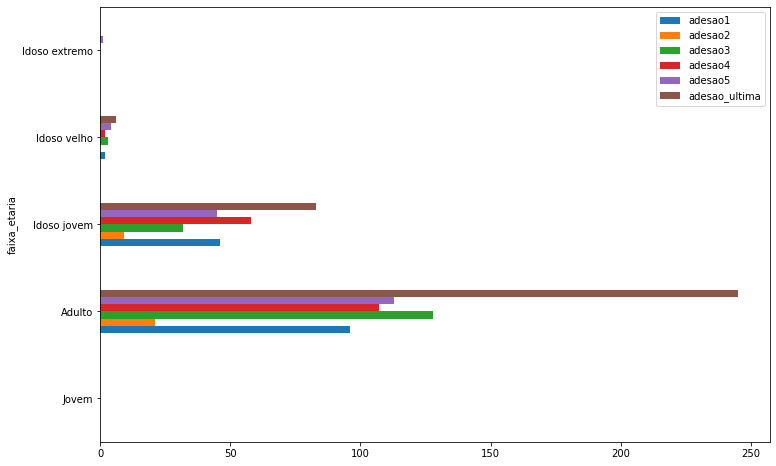

In [ ]:
df_faixaet_adesao.plot.barh(figsize=(12,8))

##***Análise Faixas de renda***

In [ ]:
df.renda.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: renda, dtype: float64

In [ ]:
#Criação de categorias de renda:
#Classe E: 0 a 1 sm
#Classe D: 1 a 3 sm
#Classe C: 3 a 5 sm
#Classe B: 5 a 15 sm
#Classe A: mais de 15 sm
df['faixa_renda'] = pd.cut(df['renda'], bins=[0,15624.0,46872.0,78120.0,234360.0,700000.0],labels=['classe E','classe D','classe C','classe B','classe A'])

In [ ]:
df_classe_renda = df.groupby('faixa_renda').size().sort_values(ascending=False)/2240 * 100

<AxesSubplot:ylabel='Classe Social dos Clientes'>

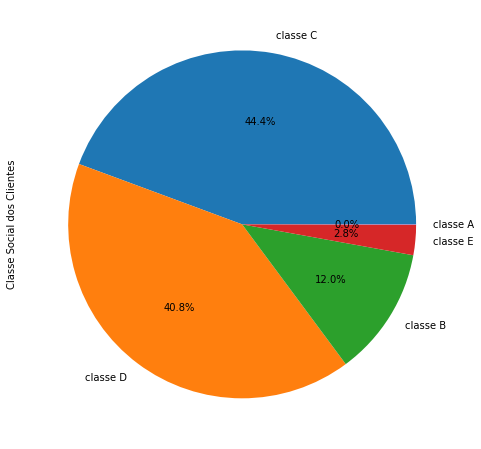

In [ ]:
df_classe_renda.plot(kind='pie', ylabel='Classe Social dos Clientes', autopct='%1.1f%%', figsize=(16,8))

###Faixa Renda x Produtos Comprados

In [ ]:
df_faixarenda_prod = df.groupby('faixa_renda').agg(compras_vinho=('valor_gasto_vinhos', 'sum'), 
                               compras_frutas=('valor_gasto_frutas', 'sum'),
                               compras_carnes = ('valor_gasto_carnes', 'sum'),
                               compras_peixes = ('valor_gasto_peixes', 'sum'),
                               compras_doces = ('valor_gasto_doces', 'sum'),
                               compras_gold = ('valor_gasto_podutosGold', 'sum'),                              
                               )
df_faixarenda_prod

,compras_vinho,compras_frutas,compras_carnes,compras_peixes,compras_doces,compras_gold
faixa_renda,,,,,,
classe E,678,329,2393,387,353,1753
classe D,50950,5832,27459,8951,5907,17957
classe C,446055,34703,203705,48752,34568,58076
classe B,178391,17527,136488,25307,19067,19629
classe A,9,14,18,8,1,12


<AxesSubplot:ylabel='faixa_renda'>

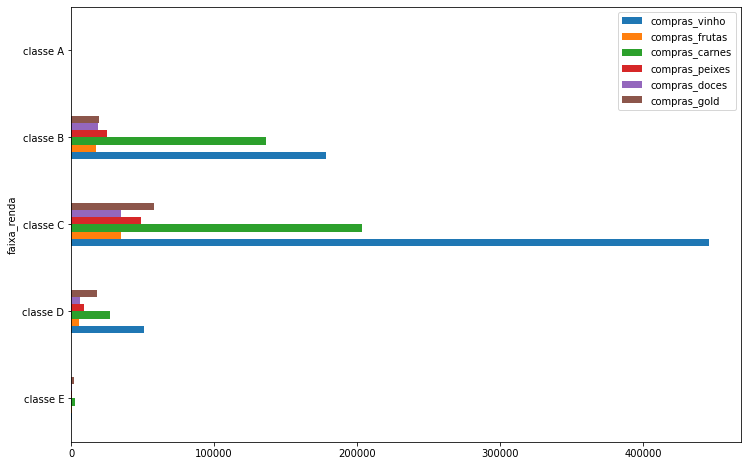

In [ ]:
df_faixarenda_prod.plot.barh(figsize=(12,8))

###Faixa Renda x Canais de compras

In [ ]:
df_faixarenda_canais = df.groupby('faixa_renda').agg(compras_desconto=('qtd_compras_desconto', 'sum'), 
                               compras_site=('qtd_compras_site', 'sum'),
                               compras_catalogo = ('qtd_compras_catalogo', 'sum'),
                               compras_lojas = ('qtd_compras_lojas', 'sum'))

df_faixarenda_canais

,compras_desconto,compras_site,compras_catalogo,compras_lojas
faixa_renda,,,,
classe E,182,146,56,144
classe D,2050,2233,598,3095
classe C,2613,5309,3569,7440
classe B,300,1362,1695,2173
classe A,4,3,1,3


<AxesSubplot:ylabel='faixa_renda'>

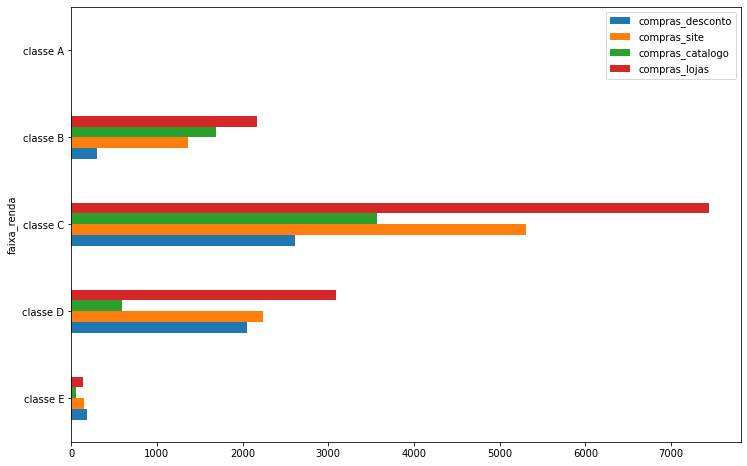

In [ ]:
df_faixarenda_canais.plot.barh(figsize=(12,8))

###Faixa de renda x Adesão as campanhas

In [ ]:
df_faixarenda_adesao = df.groupby('faixa_renda').agg(adesao1=('adesao_campanha1', 'sum'), 
                               adesao2=('adesao_campanha2', 'sum'),
                               adesao3=('adesao_campanha3', 'sum'),
                               adesao4=('adesao_campanha4', 'sum'),
                               adesao5=('adesao_campanha5','sum'),
                               adesao_ultima=('adesão_ultima_campanha','sum'))
df_faixarenda_adesao

,adesao1,adesao2,adesao3,adesao4,adesao5,adesao_ultima
faixa_renda,,,,,,
classe E,0,0,7,0,0,8
classe D,2,2,74,12,0,102
classe C,60,15,56,104,47,122
classe B,80,13,26,48,115,101
classe A,0,0,0,0,0,0


<AxesSubplot:ylabel='faixa_renda'>

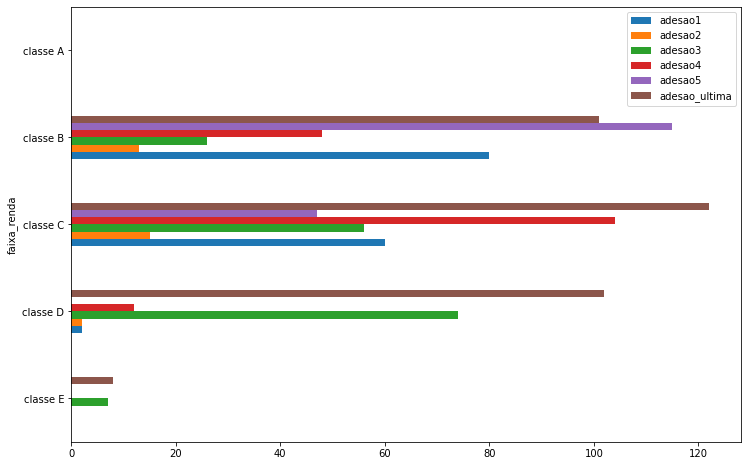

In [ ]:
df_faixarenda_adesao.plot.barh(figsize=(12,8))

#Conclusões:

A tabela apresentou quatro grupos de dados relevantes para nossa análise. São eles:
1. Perfil socio-econômico dos clientes
2. Valores gastos por determinados produtos
3. Canais de vendas utilizados pelos clientes
4. Adesão dos clientes as campanhas realizadas.



Estado civil
*   Os maiores consumidores são casados (38,6%), união estavel (25,9%) e solteiros(21,4%).
*   99,7% gastaram mais com vinho e carne. Casados gastaram mais com produtos gold do que as demais categorias.
*   Todas as categotias preferiram comprar na loja e depois no site. Casados e União estável mostram interesse por compras com desconto
*   Tendência no aumento de adesao às sucessivas campanhas. Alta adesão dos solteiros na última campanha.


Escolaridade
*   50.3 % dos clientes são graduados, 21.7% são PhD, 16.5% são mestres, 9.1% são do segundo ciclo e 2.4% possuem o ensino básico
*   Graduados, Phd e Mestres gastaram mais com vinho e carne. Graduados gastaram mais com peixes, produtos gold e doces que os demais niveis de escolaridade.
*   Todos os graus de escolariade preferiram comprar na loja e depois no site.
*   Tendência no aumento de adesao às sucessivas campanhas. Escolaridade nivel básico aderiu pouco as campanhas.

Faixa Etária
*   98,8% dos clientes são adultos e idosos jovens
*   Adultos e Idosos jovens compraram mais vinhos e carnes.
*   Adultos preferem comprar na loja e no site. Idosos jovens alem da loja e site, usam o catalogo e os descontos.
*   Esta ocorrendo um aumento de adesão de adultos e idosos jovens a cada nova campanha


Renda
*   84,24% dos clientes pertecem as classes D e C.
*   Classes B,C e D gastaram mais com vinhos e carnes.
*   Classes D e C preferiram comprar na loja e no site.
*   Houve uma aumento de adesão às campanhas das Classes B,C e D.




 

